In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

my sigma8: 0.009601785328382233


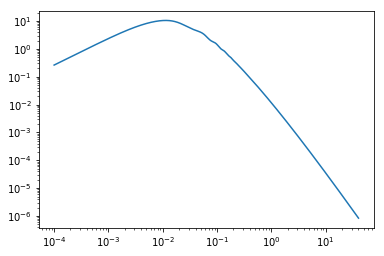

In [97]:
import sys
sys.path.append('/Users/af/Work/Cosmo/codes/1d/build')

import extruct
import numpy as np
import matplotlib.pyplot as plt
from classy import Class


zin = 100
zfin = 0


h = 0.7 
omh2 = 0.12
obh2 = 0.0244
Om = (omh2+obh2)/h**2

L = 20
Oc = 0.00

bg = extruct.Background(zin, zfin, Om, h, Oc)
bg.integrate()

BBKS = extruct.BBKS(bg, L, True, True, obh2)
BBKS.A = 1/bg.getGrowth(0)**2

nBins = 6000
kk = np.logspace(-4,np.log10(40),nBins)
Pk = []
for k in kk:
    Pk.append(BBKS.eval(k))
    
Pk = np.array(Pk)
    
from scipy.integrate import simps
eight = 8/h # to comply with CLASS
mysigma8 = simps(Pk*kk**2/(2*np.pi**2)*(3*(kk*eight*np.cos(kk*eight) - np.sin(kk*eight))/(kk*eight)**3)**2, kk)**0.5
print(f"my sigma8: {mysigma8}")

    
    
plt.loglog(kk, Pk) 
plt.show()




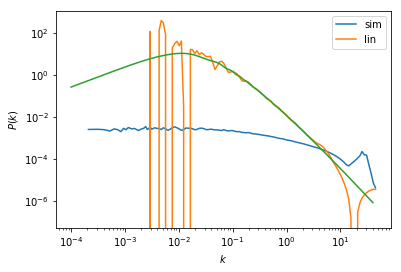

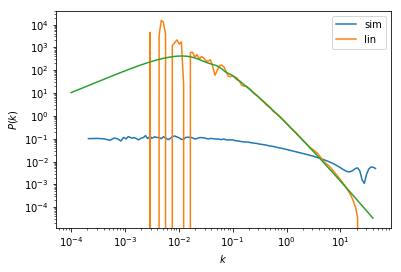

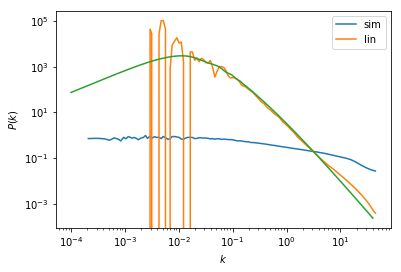

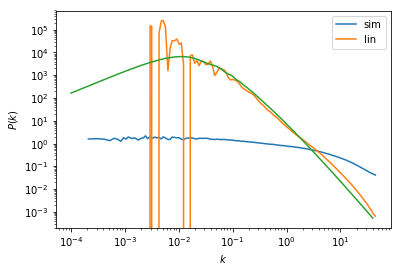

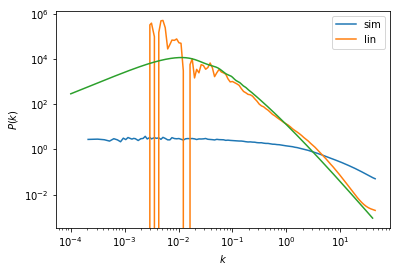

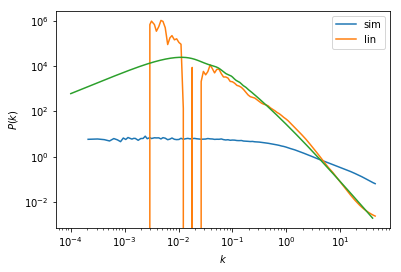

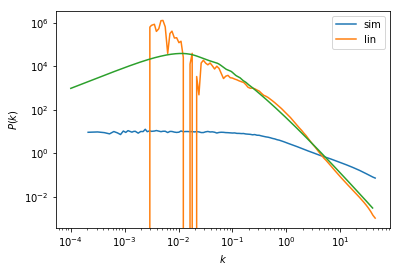

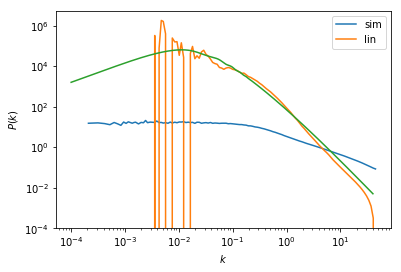

In [99]:
from scipy.signal import savgol_filter
from scipy.interpolate import UnivariateSpline

nParticles = 1024*8*8*8
god = extruct.Multiverse(0)


for i in range(1,120):
    god.bang(nParticles, bg, BBKS, L, 1) 


pkObsFFT = extruct.PowerSpectrumObs(2, np.int(130),L,1)


for z in [zin-1, 15, 5, 3, 2, 1, 0.5, 0]: 

    god.evolveAll(z)

    god.measureAll(pkObsFFT)
    pkFFT = pkObsFFT.getResult()

    pk1d = savgol_filter(pkFFT[1,1:], 41, 4, deriv=0)
    
    #pk1d = UnivariateSpline.derivative(pkFFT[0,1:],pk1d)
    #pk1dprime = pk1d.derivative(1)
    pk1dprime = np.gradient(pk1d, pkFFT[0,1:])
    pk3d = - 8*np.pi*pk1dprime / pkFFT[0,1:]
    plt.loglog(pkFFT[0,1:], pkFFT[1,1:])
    plt.loglog(pkFFT[0,1:], pk3d)
    plt.loglog(kk, Pk*bg.getGrowth(z)**2)
    plt.legend(["sim 1d", "sim 3d", "lin"])
    plt.xlabel("$k$")
    plt.ylabel("$P(k)$")
    plt.show()
    
    

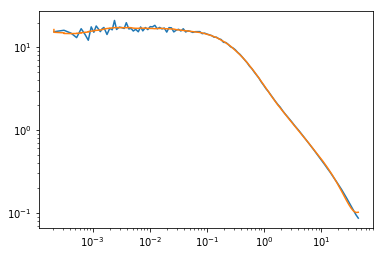

In [100]:
pk1d1 = pkFFT[1,1:]
pk1d2 = savgol_filter(pkFFT[1,1:], 41, 4)
plt.loglog(pkFFT[0,1:], pk1d1, pkFFT[0,1:], pk1d2)
plt.show()

my sigma8: 0.009601785328382233


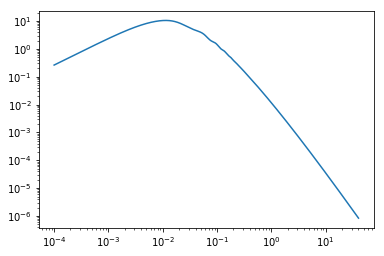

In [101]:
BBKS = extruct.BBKS(bg, L, True, False, obh2)
BBKS.A = 1/bg.getGrowth(0)**2

nBins = 6000
kk = np.logspace(-4,np.log10(40),nBins)
Pk = []
for k in kk:
    Pk.append(BBKS.eval(k))
    
Pk = np.array(Pk)
    
from scipy.integrate import simps
eight = 8/h # to comply with CLASS
mysigma8 = simps(Pk*kk**2/(2*np.pi**2)*(3*(kk*eight*np.cos(kk*eight) - np.sin(kk*eight))/(kk*eight)**3)**2, kk)**0.5
print(f"my sigma8: {mysigma8}")

    
    
plt.loglog(kk, Pk) 
plt.show()


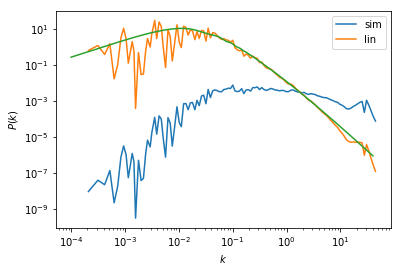

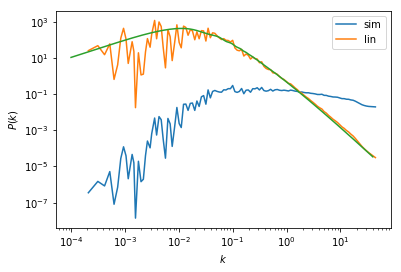

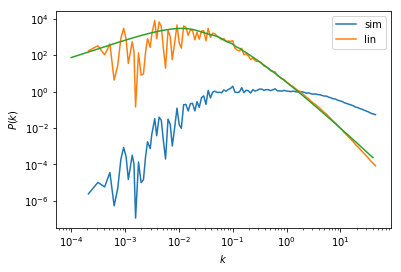

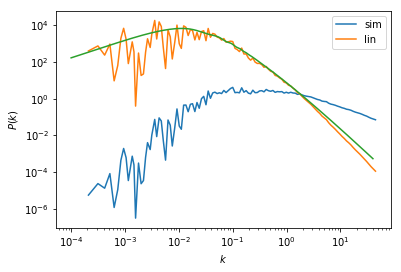

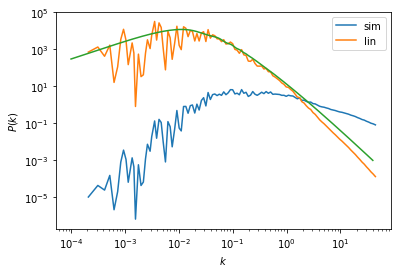

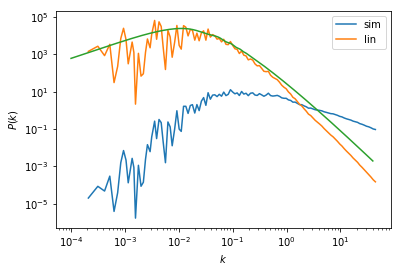

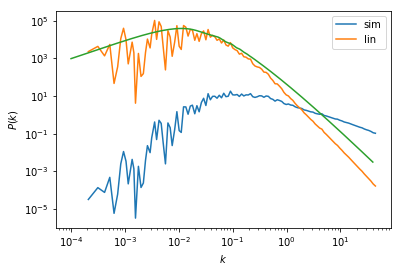

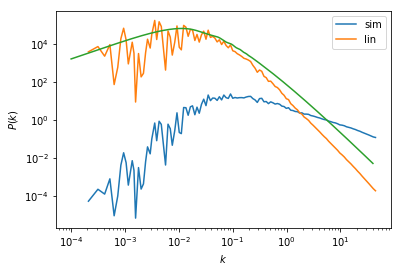

In [105]:
from scipy.signal import savgol_filter
from scipy.interpolate import UnivariateSpline

nParticles = 1024*8*8*8
god = extruct.Multiverse(0)


for i in range(1,2):
    god.bang(nParticles, bg, BBKS, L, 1) 


pkObsFFT = extruct.PowerSpectrumObs(2, np.int(130),L,1)


for z in [zin-1, 15, 5, 3, 2, 1, 0.5, 0]: 

    god.evolveAll(z)

    god.measureAll(pkObsFFT)
    pkFFT = pkObsFFT.getResult()

    pk1d = pkFFT[1,1:] #savgol_filter(pkFFT[1,1:], 41, 4, deriv=0)
    
    pk3d = np.pi*pk1d / pkFFT[0,1:]**2
    plt.loglog(pkFFT[0,1:], pkFFT[1,1:])
    plt.loglog(pkFFT[0,1:], pk3d)
    plt.loglog(kk, Pk*bg.getGrowth(z)**2)
    plt.legend(["sim", "lin"])
    plt.xlabel("$k$")
    plt.ylabel("$P(k)$")
    plt.show()
    